In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split

2023-05-17 18:09:32.976199: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 18:09:33.047350: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-05-17 18:09:33.065043: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-05-17 18:09:33.355145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
tf.config.list_physical_devices('GPU')

2023-05-17 18:09:34.129405: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2023-05-17 18:09:34.145702: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 18:09:34.145823: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [3]:
BATCH_SIZE = 8
IMG_SIZE = (299, 299)
PATH = "/home/boggog/Documents/Namibia-Road-ML"
train_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(PATH, "data.nosync", "train"),
    batch_size = BATCH_SIZE,
    image_size=IMG_SIZE
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(PATH, "data.nosync", "test"),
    batch_size = BATCH_SIZE,
    image_size=IMG_SIZE
)

NUM_CLASSES = 3
train_dataset = train_dataset.map(lambda x, y: (x, tf.one_hot(y, depth=NUM_CLASSES)))
test_dataset = test_dataset.map(lambda x, y: (x, tf.one_hot(y, depth=NUM_CLASSES)))

Found 1089 files belonging to 3 classes.
Found 194 files belonging to 3 classes.


2023-05-17 18:09:34.191267: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-17 18:09:34.191873: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 18:09:34.192003: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-05-17 18:09:34.192134: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA

In [4]:
print('Number of train batches: %d' % tf.data.experimental.cardinality(train_dataset))
print('Number of test batches: %d' % tf.data.experimental.cardinality(test_dataset))

Number of train batches: 137
Number of test batches: 25


In [5]:
def get_dataset_partitions_tf(ds, test_split=0.6, shuffle=True, shuffle_size=10000):
    if shuffle:
        # Specify seed to always have the same split distribution between runs
        ds = ds.shuffle(shuffle_size, seed=42)
    
    ds_size = tf.data.experimental.cardinality(ds).numpy()
    test_size = int(test_split * ds_size)
    val_size = int((1-test_split) * ds_size)
    
    test_ds = ds.take(test_size)    
    val_ds = ds.skip(test_size).take(val_size)
    
    return test_ds, val_ds

In [6]:
test_dataset, val_dataset = get_dataset_partitions_tf(test_dataset, test_split=0.5)

# Statistics and Plots

In [7]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

In [8]:
X_train = np.concatenate([x for x, y in train_dataset], axis=0)
y_train = np.concatenate([y for x, y in train_dataset], axis=0)
y_train_labels = np.argmax(y_train, axis=-1)

X_test = np.concatenate([x for x, y in test_dataset], axis=0)
y_test = np.concatenate([y for x, y in test_dataset], axis=0)
y_test_labels = np.argmax(y_test, axis=-1)

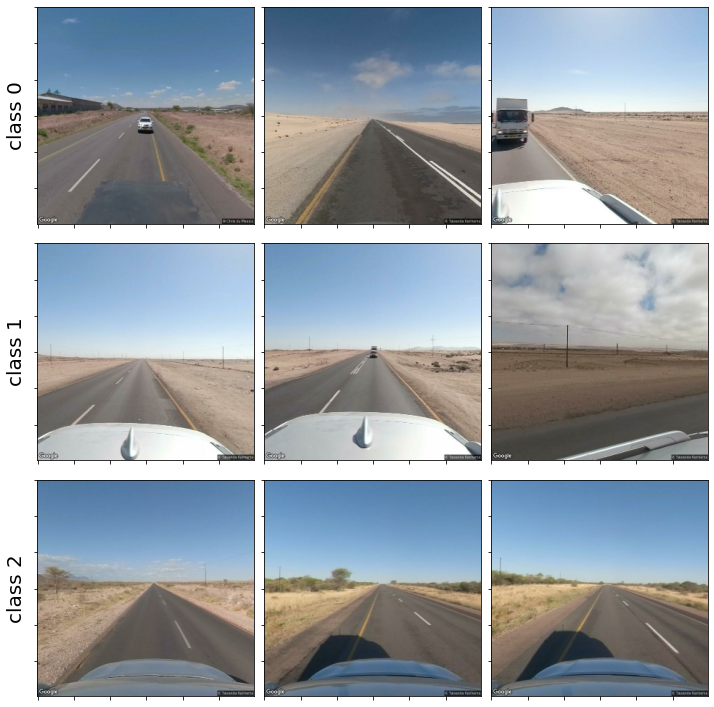

In [9]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(10,10))

for i, ax in enumerate(axes.flat[0:3]):
    ii = np.where(y_train_labels == 0)[0][i+20]
    ax.imshow(X_train[ii] / 255)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

for i, ax in enumerate(axes.flat[3:6]):
    ii = np.where(y_train_labels == 1)[0][i]
    ax.imshow(X_train[ii] / 255)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

for i, ax in enumerate(axes.flat[6:9]):
    ii = np.where(y_train_labels == 2)[0][i]
    ax.imshow(X_train[ii] / 255)
    ax.set_yticklabels([])
    ax.set_xticklabels([])

row_names = ["class {}".format(i) for i in range(3)]
for ax, row in zip(axes[:,0], row_names):
    ax.set_ylabel(row, size=20)

plt.tight_layout()
fig.savefig("../figures/Examples.pdf")
plt.show()

In [10]:
from collections import Counter
counter = Counter(np.concatenate([y_train_labels,y_test_labels]))

In [11]:
total = np.sum([i for i in counter.values()])
total

1185

In [12]:
[i / total for i in counter.values()]

[0.29535864978902954, 0.36033755274261603, 0.34430379746835443]

# Training

In [13]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip('horizontal'),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(height_factor=(0.,-0.5)),
    tf.keras.layers.RandomBrightness(factor=(-0.2,0.2)),
    tf.keras.layers.RandomContrast(factor=0.1)
    ]
)

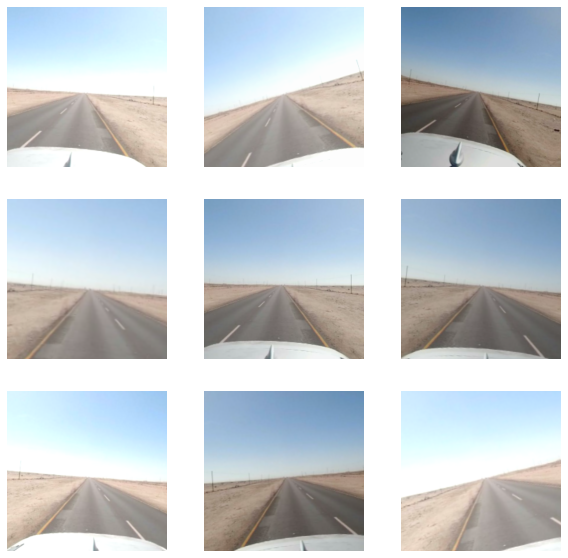

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    first_image = images[0]
    for i in range(9):
        ax = plt.subplot(3,3, i+1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis("off")

In [15]:
first_image.shape
# base_model = tf.keras.applications.MobileNetV2(
#     input_shape=IMG_SIZE+(3,),
#     include_top=False,
#     weights='imagenet'
# )
base_model = tf.keras.applications.Xception(
    input_shape=IMG_SIZE+(3,),
    include_top=False,
    weights='imagenet'
)

In [16]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

2023-05-17 18:09:46.041090: I tensorflow/stream_executor/cuda/cuda_dnn.cc:384] Loaded cuDNN version 8100


(8, 10, 10, 2048)


2023-05-17 18:09:47.071227: I tensorflow/stream_executor/cuda/cuda_blas.cc:1614] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


In [17]:
base_model.trainable = False
base_model.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 299, 299, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 149, 149, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 149, 149, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

In [18]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)
print(feature_batch_average.shape)

(8, 2048)


In [19]:
prediction_layer = tf.keras.layers.Dense(3)
prediction_batch = prediction_layer(feature_batch_average)

In [20]:
# preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
# preprocess_input = tf.keras.applications.mobilenet_v3.preprocess_input
preprocess_input = tf.keras.applications.xception.preprocess_input

In [21]:
inputs = tf.keras.Input(shape=(IMG_SIZE + (3,)))
x = data_augmentation(inputs)
x = preprocess_input(x)
x = base_model(x, training=False)
x = global_average_layer(x)
x = tf.keras.layers.Dropout(0.2)(x)
x = prediction_layer(x)
outputs = tf.keras.layers.Softmax()(x)
model = tf.keras.Model(inputs, outputs)

In [22]:
import tensorflow_addons as tfa

In [23]:
base_learning_rate = 0.0001
radam = tfa.optimizers.RectifiedAdam(learning_rate=base_learning_rate)
ranger = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)
model.compile(optimizer=ranger,
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [24]:
len(model.trainable_variables)

2

In [25]:
initial_epochs = 20
history = model.fit(train_dataset,
                    epochs=initial_epochs,
                    validation_data=val_dataset)

Epoch 1/20


137/137 [==============================] - 13s 73ms/step - loss: 1.1014 - accuracy: 0.4160 - val_loss: 1.1105 - val_accuracy: 0.4688
Epoch 2/20
137/137 [==============================] - 10s 69ms/step - loss: 1.0586 - accuracy: 0.4481 - val_loss: 1.0616 - val_accuracy: 0.4896
Epoch 3/20
137/137 [==============================] - 9s 69ms/step - loss: 1.0197 - accuracy: 0.5106 - val_loss: 1.0262 - val_accuracy: 0.5208
Epoch 4/20
137/137 [==============================] - 9s 68ms/step - loss: 0.9719 - accuracy: 0.6079 - val_loss: 0.9718 - val_accuracy: 0.6333
Epoch 5/20
137/137 [==============================] - 9s 65ms/step - loss: 0.9400 - accuracy: 0.6501 - val_loss: 0.8978 - val_accuracy: 0.7500
Epoch 6/20
137/137 [==============================] - 9s 66ms/step - loss: 0.8962 - accuracy: 0.6869 - val_loss: 0.8573 - val_accuracy: 0.6889
Epoch 7/20
137/137 [==============================] - 9s 68ms/step - loss: 0.8619 - accuracy: 0.6951 - val_loss: 0.8358 - val_accuracy: 0.7333
Epoch 8/

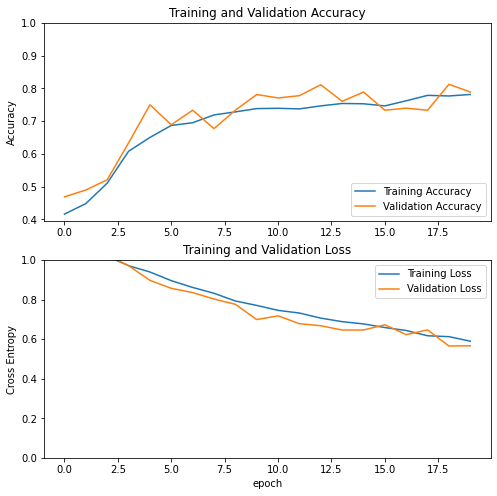

In [26]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()


In [27]:
base_model.trainable = True

In [28]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 100

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable = False


Number of layers in the base model:  132


In [29]:
radam = tfa.optimizers.RectifiedAdam(learning_rate=base_learning_rate/10)
ranger = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
            #   optimizer = tf.keras.optimizers.RMSprop(learning_rate=base_learning_rate/10),
              optimizer = ranger,
              metrics=['accuracy'])


In [30]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 299, 299, 3)]     0         
                                                                 
 sequential (Sequential)     (None, 299, 299, 3)       0         
                                                                 
 tf.math.truediv (TFOpLambda  (None, 299, 299, 3)      0         
 )                                                               
                                                                 
 tf.math.subtract (TFOpLambd  (None, 299, 299, 3)      0         
 a)                                                              
                                                                 
 xception (Functional)       (None, 10, 10, 2048)      20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0     

In [31]:
len(model.trainable_variables)


41

In [32]:
fine_tune_epochs = 40
total_epochs =  initial_epochs + fine_tune_epochs

model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="models/2023-05-17-Xception",
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)

callbacks = [model_checkpoint_callback]

history_fine = model.fit(train_dataset,
                         epochs=total_epochs,
                         callbacks=callbacks,
                         initial_epoch=history.epoch[-1],
                         validation_data=val_dataset)

Epoch 20/60


137/137 [==============================] - 17s 82ms/step - loss: 0.3605 - accuracy: 0.7704 - val_loss: 0.3347 - val_accuracy: 0.7778
Epoch 21/60
137/137 [==============================] - 11s 77ms/step - loss: 0.3464 - accuracy: 0.7585 - val_loss: 0.3479 - val_accuracy: 0.7604
Epoch 22/60
137/137 [==============================] - 11s 79ms/step - loss: 0.3259 - accuracy: 0.7686 - val_loss: 0.2813 - val_accuracy: 0.8111
Epoch 23/60
137/137 [==============================] - 10s 76ms/step - loss: 0.3103 - accuracy: 0.7686 - val_loss: 0.2725 - val_accuracy: 0.7889
Epoch 24/60
137/137 [==============================] - 11s 76ms/step - loss: 0.3042 - accuracy: 0.7769 - val_loss: 0.2983 - val_accuracy: 0.8111
Epoch 25/60
137/137 [==============================] - 11s 77ms/step - loss: 0.2959 - accuracy: 0.7952 - val_loss: 0.3201 - val_accuracy: 0.7292
Epoch 26/60
137/137 [==============================] - 11s 77ms/step - loss: 0.2801 - accuracy: 0.8026 - val_loss: 0.3242 - val_accuracy: 0.72

In [33]:
model.load_weights("models/2023-05-17-Xception")

In [34]:
model.evaluate(train_dataset)

137/137 [==============================] - 4s 29ms/step - loss: 0.1534 - accuracy: 0.8999


[0.15338212251663208, 0.899908185005188]

In [35]:
model.evaluate(val_dataset)

12/12 [==============================] - 0s 28ms/step - loss: 0.2629 - accuracy: 0.8333


[0.2629324793815613, 0.8333333134651184]

In [36]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

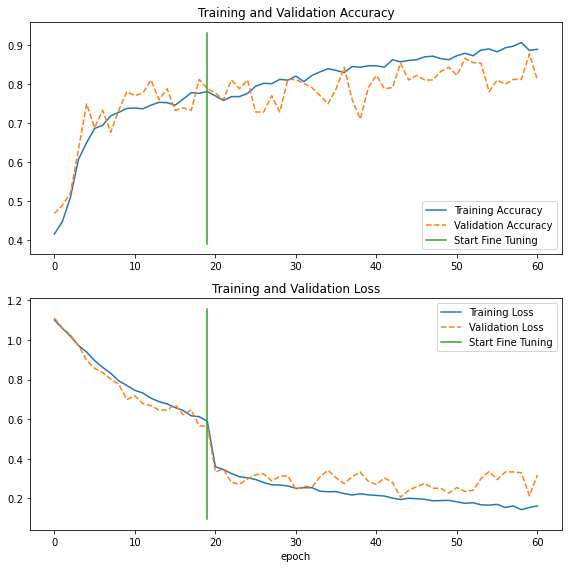

In [37]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy', ls="--")
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss', ls="--")
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.tight_layout()
plt.savefig("../figures/2023-05-17-training.pdf")
plt.show()

In [38]:
test_loss, test_accuracy = model.evaluate(test_dataset)
print('Test accuracy :', test_accuracy)

12/12 [==============================] - 0s 31ms/step - loss: 0.2583 - accuracy: 0.8333
Test accuracy : 0.8333333134651184


In [39]:
y_probas = []
y_true = []
y_true_ohc = []
y_pred = []
images_test = []
for images, labels in test_dataset:
    y_true_ohc.append(labels)
    y_true.append(np.argmax(labels, axis=-1))
    probas = model.predict(images)
    y_probas.append(probas)
    y_pred.append(np.argmax(probas, axis=-1))
    images_test.append(images)

y_true = tf.concat([item for item in y_true], axis = 0)
y_true_ohc = tf.concat([item for item in y_true_ohc], axis = 0)
y_pred = tf.concat([item for item in y_pred], axis = 0)
y_probas = tf.concat([item for item in y_probas], axis = 0)
images_test = tf.concat([item for item in images_test], axis = 0)

1/1 [==============================] - 0s 12ms/step


In [40]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score
accuracy_value = accuracy_score(y_true_ohc.numpy().argmax(axis=-1), y_probas.numpy().argmax(axis=-1))
balanced_acc = balanced_accuracy_score(y_true_ohc.numpy().argmax(axis=-1), y_probas.numpy().argmax(axis=-1))
recall = recall_score(y_true_ohc.numpy().argmax(axis=-1), y_probas.numpy().argmax(axis=-1), average='weighted')
precision = precision_score(y_true_ohc.numpy().argmax(axis=-1), y_probas.numpy().argmax(axis=-1), average='weighted')
print("accuracy:", accuracy_value)
print("balanced accuracy:", balanced_acc)
print("recall:", recall)
print("precision:", precision)

accuracy: 0.8666666666666667
balanced accuracy: 0.8525641025641025
recall: 0.8666666666666667
precision: 0.867948717948718


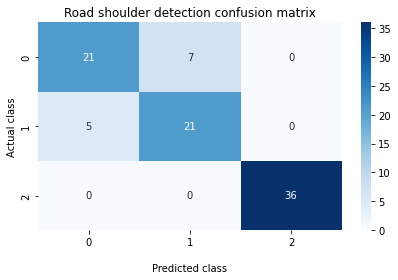

In [41]:
import seaborn as sns

confusion_matrix = tf.math.confusion_matrix(y_true, y_pred)
ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')

ax.set_title('Road shoulder detection confusion matrix');
ax.set_xlabel('\nPredicted class')
ax.set_ylabel('Actual class');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0','1', '2'])
ax.yaxis.set_ticklabels(['0','1', '2'])

## Display the visualization of the Confusion Matrix.
plt.tight_layout()
plt.savefig("../figures/2023-05-17-ConfusionMatrix.pdf")
plt.show()

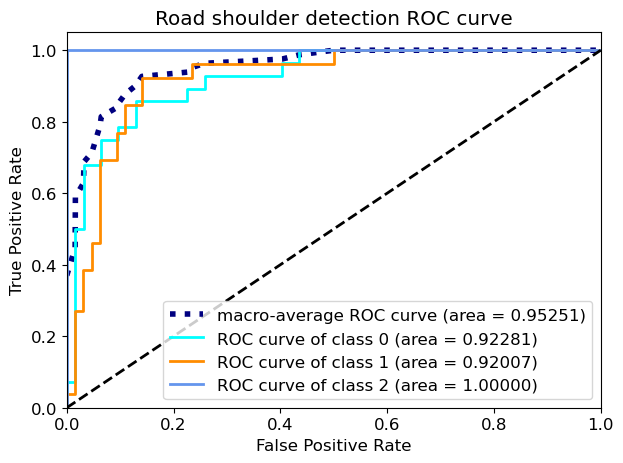

In [42]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc

plt.style.use('default')
plt.rcParams.update({'font.size': 12})

# Compute ROC curve and ROC area for each class
n_classes = 3
lw = 2 # line width
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_ohc.numpy()[:, i], y_probas.numpy()[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_val_ohc.todense().ravel(), y_pred.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:.5f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

class_names = ["0", "1", "2"]
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:.5f})".format(class_names[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Road shoulder detection ROC curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("../figures/2023-05-17-ROC.pdf")
plt.show()


# Wrong Predictions

In [43]:
wrong_pred_idxs = np.where(y_pred.numpy() != y_true.numpy())[0]

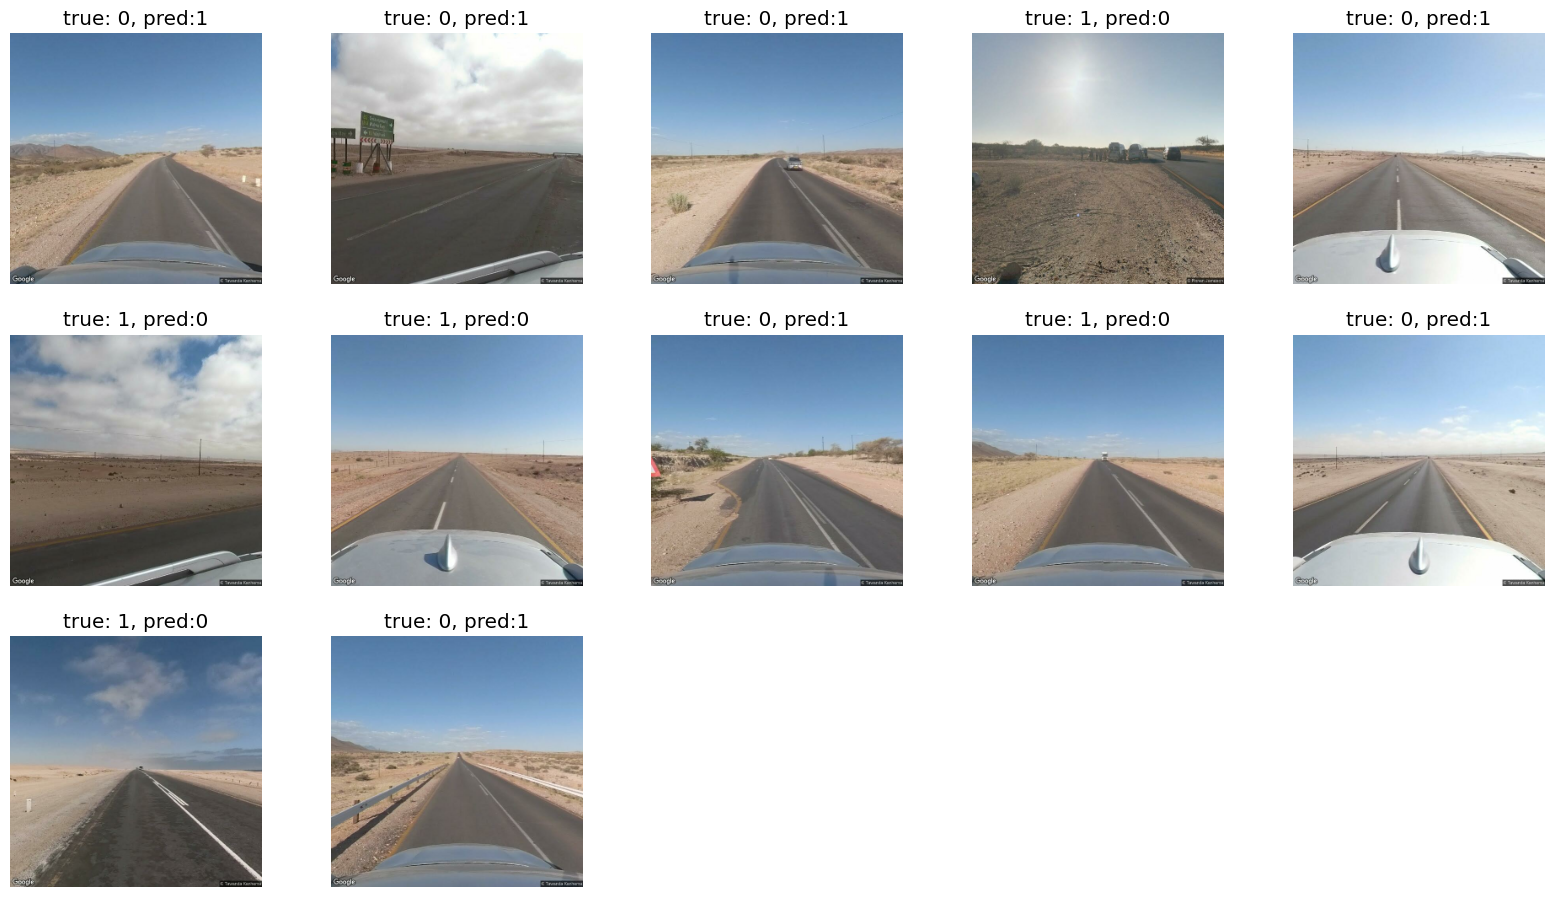

In [44]:
plt.figure(figsize=(20, 15))
for i, im_idx in enumerate(wrong_pred_idxs[0:20]):
    ax = plt.subplot(4,5, i+1)
    plt.title("true: "+str(y_true[im_idx].numpy())+", pred:"+str(y_pred[im_idx].numpy()))
    plt.imshow(images_test[im_idx] / 255)
    plt.axis("off")

## Combining classes 0 and 1

In [45]:
def combine_01(y_ohc):
    return [y_ohc[0]+y_ohc[1], y_ohc[2]]

y_true_ohc_01 = np.array([combine_01(y.numpy()) for y in y_true_ohc])
y_probas_01= np.array([combine_01(y.numpy()) for y in y_probas])

In [46]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score
acc = accuracy_score(y_true_ohc_01.argmax(axis=-1), y_probas_01.argmax(axis=-1))
balanced_acc = balanced_accuracy_score(y_true_ohc_01.argmax(axis=-1), y_probas_01.argmax(axis=-1))
recall = recall_score(y_true_ohc_01.argmax(axis=-1), y_probas_01.argmax(axis=-1))
precision = precision_score(y_true_ohc_01.argmax(axis=-1), y_probas_01.argmax(axis=-1))
print("accuracy:", acc)
print("balanced accuracy:", balanced_acc)
print("recall:", recall)
print("precision:", precision)

accuracy: 1.0
balanced accuracy: 1.0
recall: 1.0
precision: 1.0


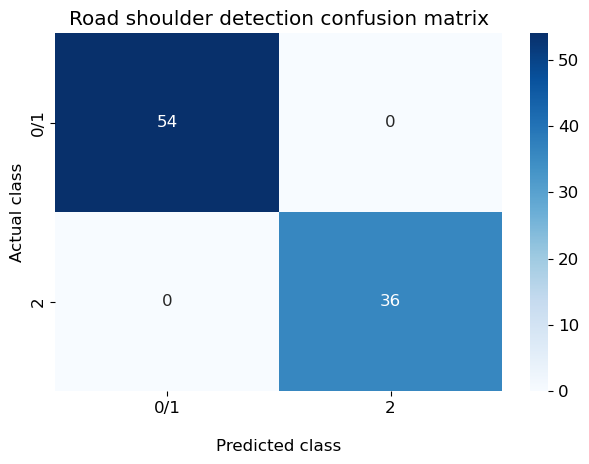

In [47]:
confusion_matrix_01 = tf.math.confusion_matrix(np.argmax(y_true_ohc_01, axis=-1), np.argmax(y_probas_01, axis=-1))
ax = sns.heatmap(confusion_matrix_01, annot=True, cmap='Blues')

ax.set_title('Road shoulder detection confusion matrix');
ax.set_xlabel('\nPredicted class')
ax.set_ylabel('Actual class');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['0/1', '2'])
ax.yaxis.set_ticklabels(['0/1', '2'])

## Display the visualization of the Confusion Matrix.
plt.tight_layout()
plt.savefig("../figures/2023-05-17-ConfusionMatrix_2.pdf")
plt.show()

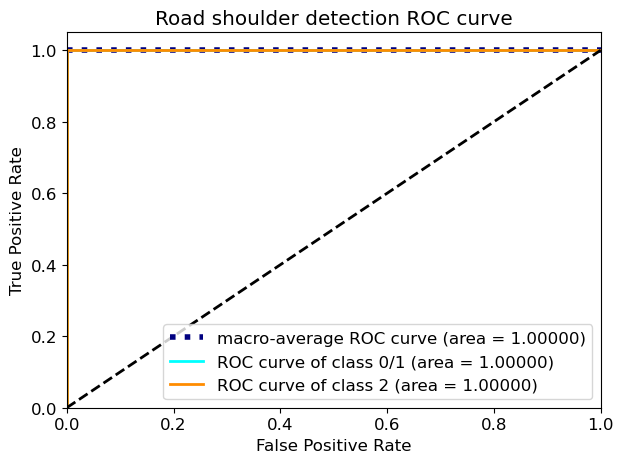

In [48]:
plt.style.use('default')
plt.rcParams.update({'font.size': 12})

# Compute ROC curve and ROC area for each class
n_classes = 2
lw = 2 # line width
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_ohc_01[:, i], y_probas_01[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
# fpr["micro"], tpr["micro"], _ = roc_curve(y_val_ohc.todense().ravel(), y_pred.ravel())
# roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:.5f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

class_names = ["0/1", "2"]
colors = cycle(["aqua", "darkorange", "cornflowerblue", "green"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:.5f})".format(class_names[i], roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Road shoulder detection ROC curve")
plt.legend(loc="lower right")
plt.tight_layout()
plt.savefig("../figures/2023-05-17-ROC_2.pdf")
plt.show()
